In [1]:
!pip install -U future

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: future
    Found existing installation: future 0.18.3
    Uninstalling future-0.18.3:
      Successfully uninstalled future-0.18.3


In [2]:
from __future__ import print_function, division
from builtins import range

import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Bandit:
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0
  def pull(self):
    return np.random.randn() + self.m
  def update(self, x):
    self.N+= 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

In [4]:
def run_experiment (m1, m2, m3, eps, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit (m3)]
  data = np.empty (N)
  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3)
    else:
      j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data)/ (np.arange(N) + 1)
  #plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()
  for b in bandits:
    print(b.mean)
  return cumulative_average

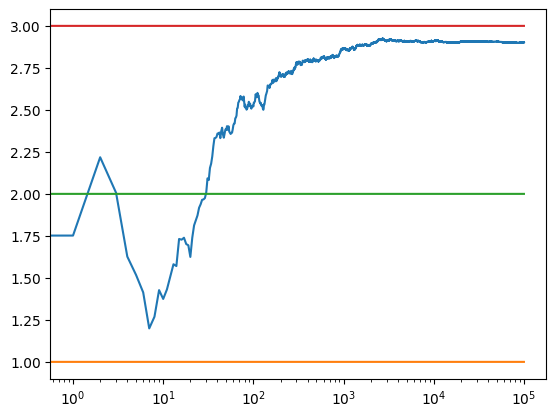

0.9981602041024995
1.9805071958369131
3.0059925253885087


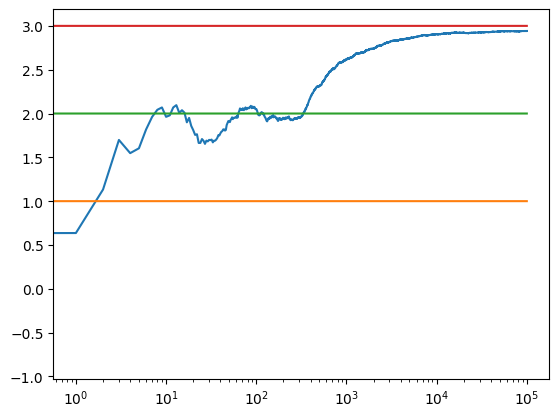

0.9762019180252399
1.9948122285125747
2.995546347921556


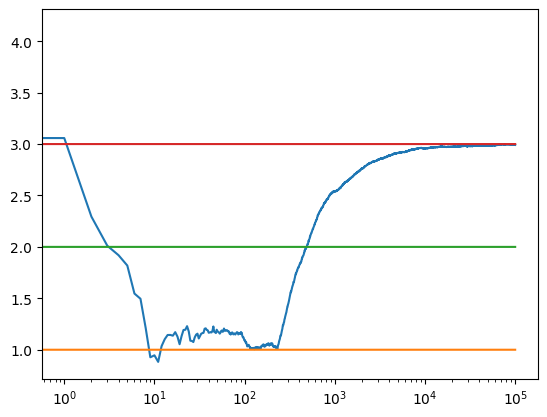

1.0087868761035805
2.071622153206988
3.0059726496172674


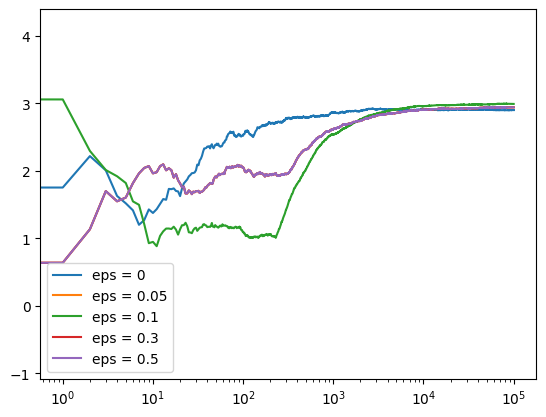

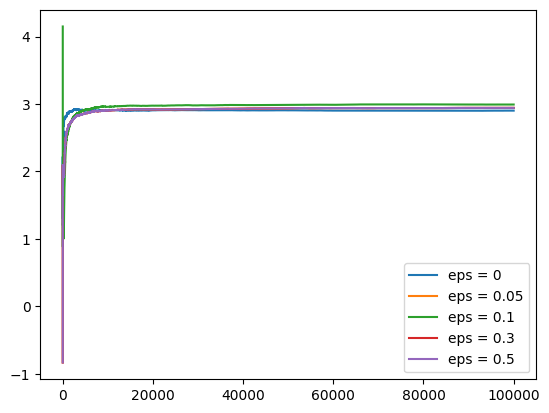

In [11]:
if __name__ == '__main__':
  c_1 = run_experiment (1.0, 2.0, 3.0, 0.1, 100000)
  c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
  c_01 = run_experiment (1.0, 2.0, 3.0, 0.01, 100000)
  #log scale plot
  plt.plot(c_1, label='eps = 0')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.3')
  plt.plot(c_05, label='eps = 0.5')
  plt.legend()
  plt.xscale('log')
  plt.show()
  # linear plot
  plt.plot(c_1, label='eps = 0')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.3')
  plt.plot(c_05, label='eps = 0.5')
  plt.legend()
  plt.show()